# Text Based Emotion Detection

In [2]:
# Importing Libraries and Datasets
import pandas as pd
import numpy as np
import neattext.functions as nfx

In [3]:
# Loading data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading Dataset 
df= pd.read_csv("tweet_emotions.csv")

In [5]:
# Preview
df.head()

,tweet_id,Emotion,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [6]:
# Shape
df.shape

(40000, 3)

In [7]:
# Datatypes
df.dtypes

tweet_id     int64
Emotion     object
content     object
dtype: object

In [8]:
# df = df.drop("tweet_id", axis = 1)
# — because tweet_id is already gone.

In [9]:
df.columns

Index(['tweet_id', 'Emotion', 'content'], dtype='object')

In [10]:
df.shape

(40000, 3)

In [11]:
df.head(10)

,tweet_id,Emotion,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [12]:
# Checking for the missing values
df.isnull().sum()

tweet_id    0
Emotion     0
content     0
dtype: int64

In [13]:
# Value Count for the Emotions
df['Emotion'].value_counts()

Emotion
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

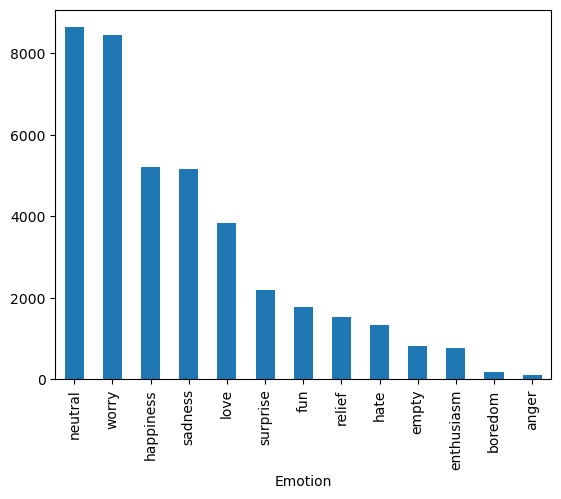

In [14]:
# Value Count for the Emotions
df['Emotion'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Emotion', ylabel='count'>

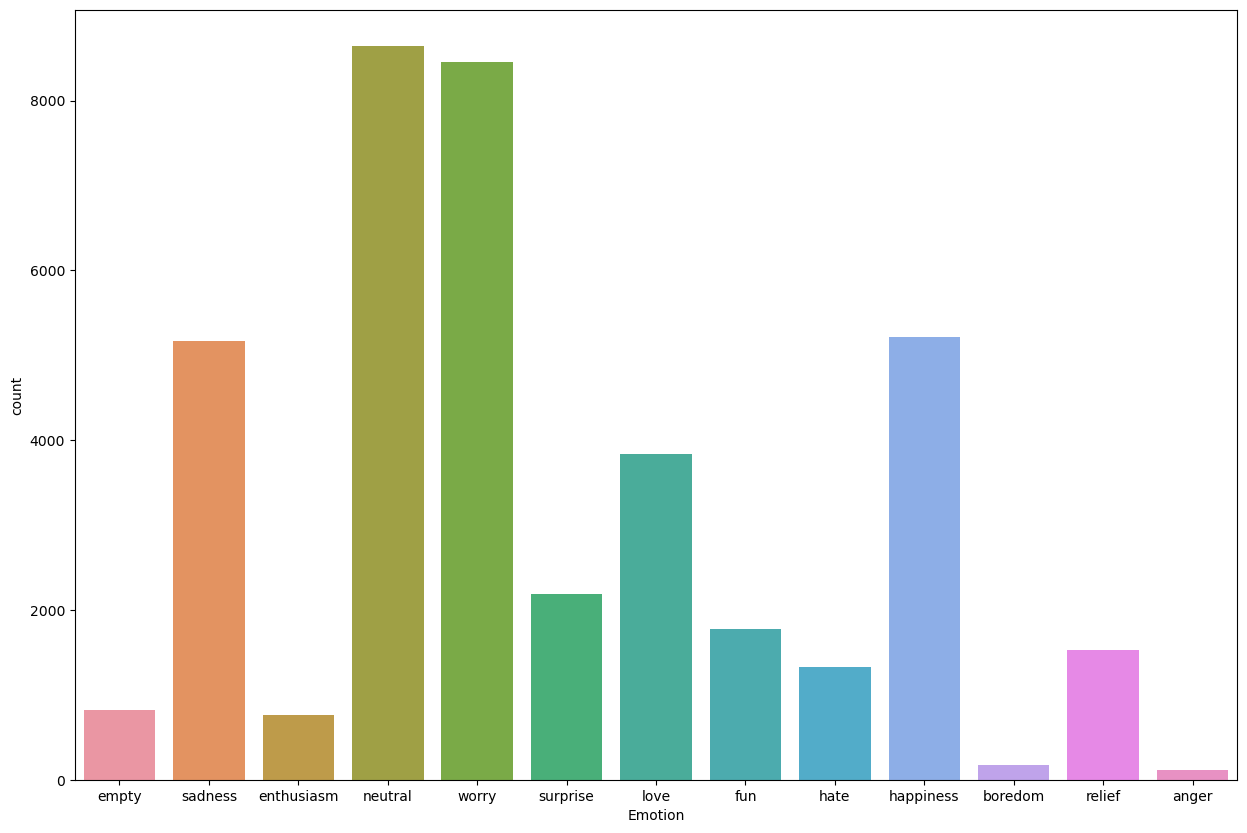

In [15]:
#using Seaborn to Plot
plt.figure(figsize=(15,10))
sns.countplot(x='Emotion', data=df)

# Exploration 
+ Stentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion 
    - worlcloud

In [16]:
# Sentiment Analysis
from textblob import TextBlob

In [17]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [18]:
# Test Fxn
get_sentiment("I love coding")

'Positive'

In [19]:
df['Sentiment'] = df['content'].apply(get_sentiment)

In [20]:
df.head(5)

,tweet_id,Emotion,content,Sentiment
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [21]:
# Compare - Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion     Sentiment
anger       Negative       34
            Neutral        41
            Positive       35
boredom     Negative       80
            Neutral        56
            Positive       43
empty       Negative      168
            Neutral       418
            Positive      241
enthusiasm  Negative      100
            Neutral       254
            Positive      405
fun         Negative      205
            Neutral       474
            Positive     1097
happiness   Negative      345
            Neutral      1224
            Positive     3640
hate        Negative      694
            Neutral       364
            Positive      265
love        Negative      214
            Neutral       684
            Positive     2944
neutral     Negative     1156
            Neutral      4442
            Positive     3040
relief      Negative      207
            Neutral       477
            Positive      842
sadness     Negative     1886
            Neutral      1696
            Positi

<Axes: xlabel='Emotion,Sentiment'>

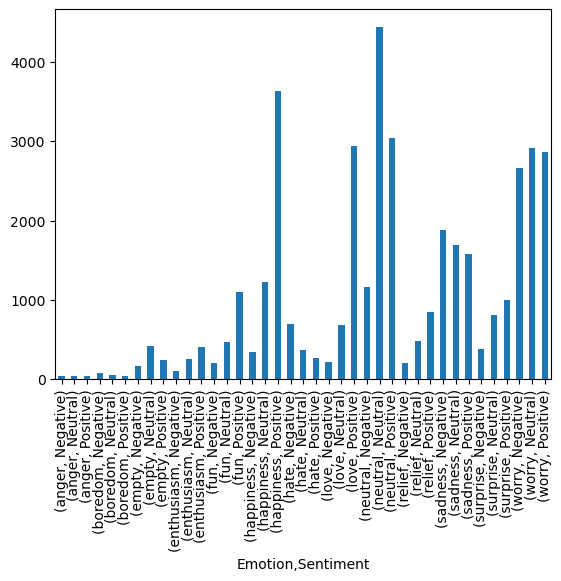

In [22]:
# First Method : Using Matplotlib
# Compare - Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


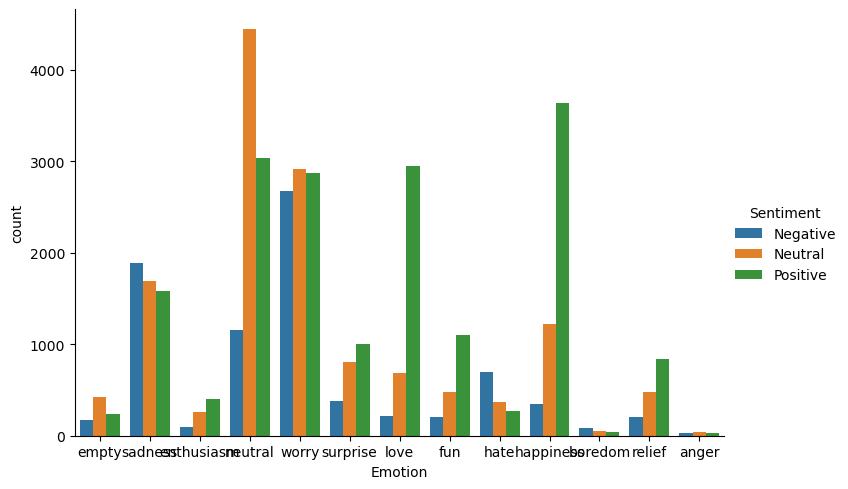

In [23]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

# Text Cleaning
+ Remove Noise
    - stopwords
    - special characters
    - punctuations etc.

In [24]:
# Neat Test
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
df['Clean_content'] = df['content'].apply(nfx.remove_stopwords)

In [26]:
df['Clean_content'] = df['Clean_content'].apply(nfx.remove_userhandles)

In [27]:
df['Clean_content'] = df['Clean_content'].apply(nfx.remove_punctuations)

In [28]:
df[['content','Clean_content']]

,content,Clean_content
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


# Keyword Extraction
+ Extract most common words per class of emotion

In [29]:
from collections import Counter

In [30]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [31]:
# List of Emotions
emotion_list = df['Emotion'].unique().tolist()

In [32]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [33]:
fun_list = df[df['Emotion'] == 'fun']['Clean_content'].tolist()

In [34]:
# Fun Document
fun_docx = ' '.join(fun_list)

In [35]:
fun_docx

'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore   lt3 gonna twitter ) cause amazing lol come canada perform RIP leonardo great mini fiddler crab   out memo looks amazing   OMG Ur alive LOL 2day gone sooo slow Im going insane Grrr tonight   california vintage ahahah BEST dresses want dont ebay (    Umm yeah Thats probably pretty good note self eeeeeewwwwwwww   Thats awesome weekend cant Im moving Sat lot fun finished im not color drawing come   Lettuce amp spinach best cool weather live floridanot luck growing those   know enjoy watching twitter entertaining comic miss BFF rocking Hotel California now   songs stay same Whats next Hmmm Careless whisper   dissapointment hhaha creeped ice cream social good times lars real girl sad movie playing street fighter IV Seth Raped clear DVR getting rid tomorrw   hell yeah missed u nite lol u like opinion wish   burning trees trying dresses spent 2 hours playing TF2 think Im better started unn

In [36]:
# Keyword Extraction
keyword_fun = extract_keywords(fun_docx)

In [37]:
keyword_fun

{'fun': 128,
 'lol': 123,
 'Im': 119,
 'like': 100,
 'good': 90,
 'day': 84,
 'haha': 83,
 'going': 73,
 'im': 71,
 'u': 71,
 'got': 65,
 'think': 59,
 'amp': 58,
 'night': 58,
 'today': 56,
 'know': 54,
 'it': 53,
 'cant': 51,
 'time': 51,
 'great': 47,
 'tonight': 46,
 'love': 44,
 'want': 43,
 'wait': 43,
 '2': 42,
 'right': 42,
 'tomorrow': 41,
 'new': 40,
 'work': 39,
 'funny': 39,
 'gonna': 38,
 'Ill': 37,
 'LOL': 36,
 'yeah': 35,
 'nice': 35,
 'thats': 34,
 'now': 33,
 'home': 33,
 'look': 33,
 'me': 33,
 'cool': 30,
 'better': 30,
 'week': 30,
 'come': 29,
 'Ive': 29,
 'you': 29,
 'way': 29,
 'sleep': 29,
 'getting': 28,
 'morning': 28}

In [38]:
# Plot 
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token' , y = 'count' , data=df_01)
    plt.xticks(rotation = 45)
    plt.show()

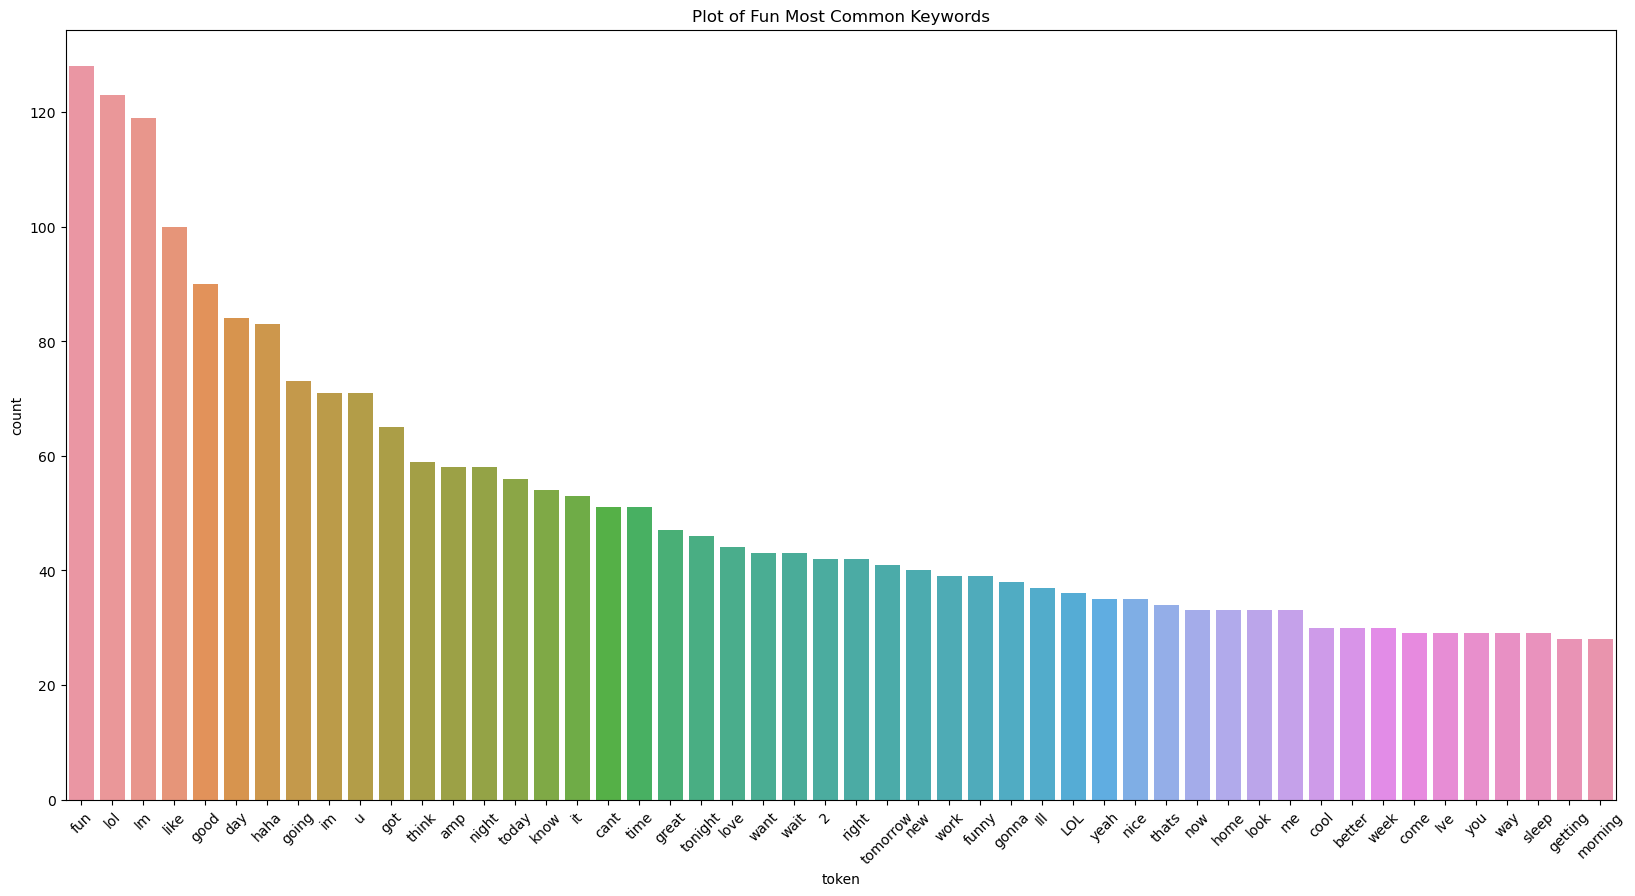

In [39]:
plot_most_common_words(keyword_fun , "Fun")

In [40]:
# Word Cloud
from wordcloud import WordCloud

In [41]:
def plot_wordcloud(docx):
        mywordcloud = WordCloud().generate(docx)
        plt.figure(figsize = (20,10))
        plt.imshow(mywordcloud,interpolation = 'bilinear')
        plt.axis('off')
        plt.show()

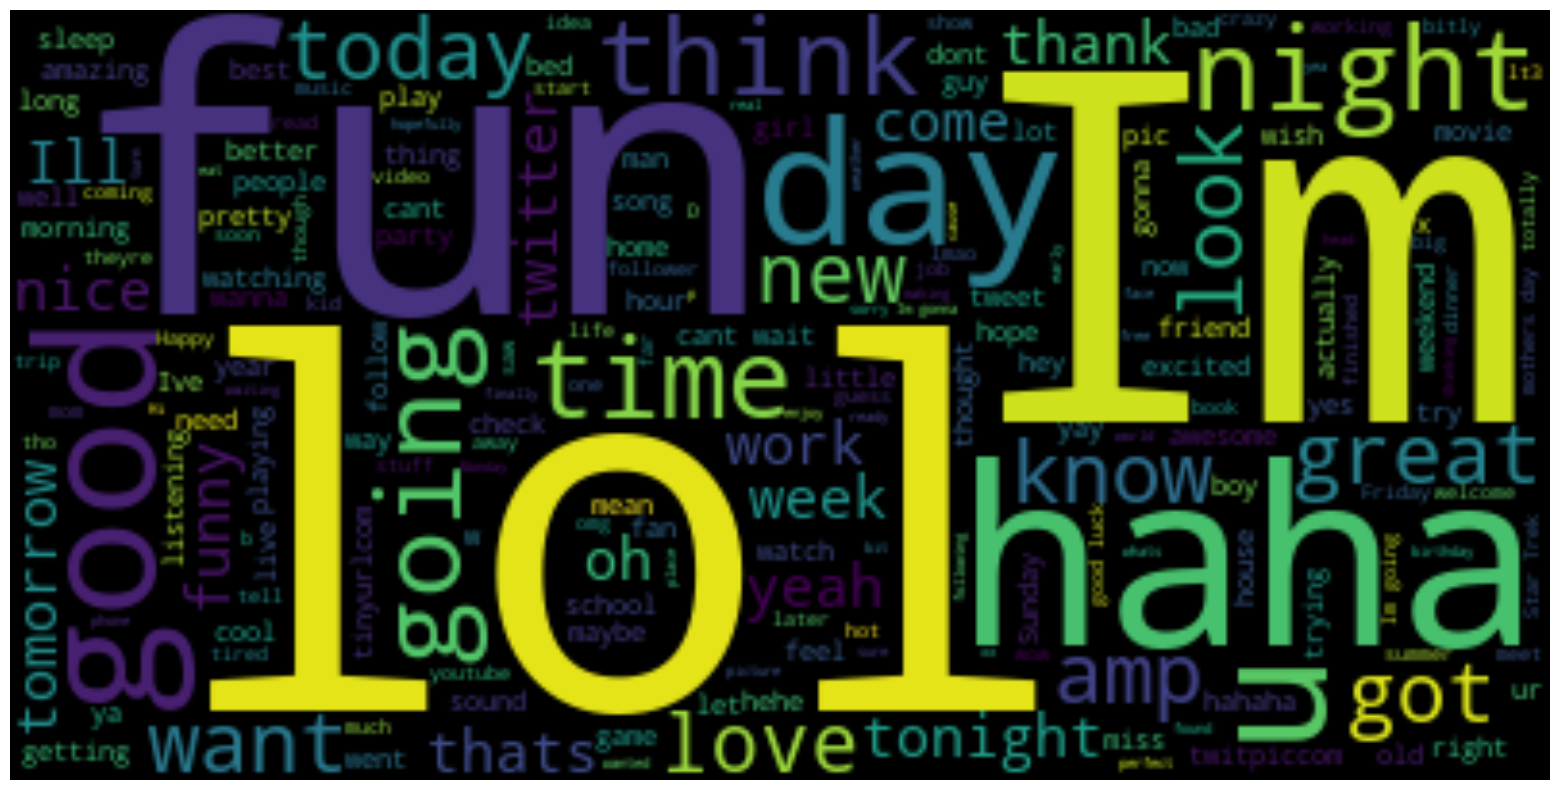

In [42]:
plot_wordcloud(fun_docx)

# Machine Learning
+ Logistic regression
+ Knn
+ Decision tree

In [125]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Spliting the dataset
from sklearn.model_selection import train_test_split

# Build Features From Our Text

In [126]:
Xfeatures = df['Clean_content']
ylabels = df['Emotion']

In [127]:
Xfeatures

0          know listenin bad habit earlier started frea...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: Clean_content, Length: 40000, dtype: object

In [128]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [129]:
# Get features By Name
cv.get_feature_names_out()

array(['00', '000', '002', ..., '½you', '½z', '½ï'], dtype=object)

In [130]:
# Spliting The Dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

# Building Model

In [131]:
nv_model =  MultinomialNB() 
nv_model.fit(X_train, y_train)

MultinomialNB()

In [132]:
# Accuracy
nv_model.score(X_test, y_test)

0.31575

In [133]:
lr_model =  LogisticRegression() 
lr_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
# Accuracy 
lr_model.score(X_test,y_test)

0.3328333333333333

In [135]:
# Predictions
y_pred_for_lr = lr_model.predict(X_test)

In [136]:
y_pred_for_lr

array(['neutral', 'neutral', 'worry', ..., 'neutral', 'neutral',
       'sadness'], dtype=object)

# Making A Single Prediction
+ Vectorized our Text
+ Applied our model

In [137]:
sample_text = ["I Really Love Coding Very Much"]

In [138]:
vect = cv.transform(sample_text).toarray()

In [139]:
# Make Prediction
lr_model.predict(vect)

array(['surprise'], dtype=object)

In [140]:
# Checking For Prediction Percentage (Probability)/ Confidence Score
lr_model.predict_proba(vect)

array([[0.00112276, 0.01149302, 0.0129064 , 0.00333352, 0.01620527,
        0.02970251, 0.01650333, 0.27121097, 0.03805564, 0.00694288,
        0.10845863, 0.36556471, 0.11850036]])

In [141]:
# Get All Class for our Model
lr_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [142]:
np.max(lr_model.predict_proba(vect))

0.3655647108768128

In [143]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_precentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    print(prediction[0])
    return pred_precentage_for_all

In [144]:
predict_emotion(sample_text,lr_model)

Prediction:surprise, Prediction Score:0.3655647108768128
surprise


{'anger': 0.0011227597348887665,
 'boredom': 0.011493021816853395,
 'empty': 0.01290639994047078,
 'enthusiasm': 0.0033335172409584236,
 'fun': 0.01620527095274838,
 'happiness': 0.029702507236111602,
 'hate': 0.016503330213880018,
 'love': 0.27121097154477664,
 'neutral': 0.038055641136316175,
 'relief': 0.006942877865013007,
 'sadness': 0.10845863477538444,
 'surprise': 0.3655647108768128,
 'worry': 0.11850035666578554}

In [145]:
predict_emotion(["i hate coding so much at night"],lr_model)

Prediction:hate, Prediction Score:0.4077453232687026
hate


{'anger': 0.0003391726201471928,
 'boredom': 0.00453265282742211,
 'empty': 0.012359080195094711,
 'enthusiasm': 0.006950058788502506,
 'fun': 0.01212651683775153,
 'happiness': 0.01904926496824378,
 'hate': 0.4077453232687026,
 'love': 0.019371706531271782,
 'neutral': 0.2836102634316469,
 'relief': 0.003859159233749382,
 'sadness': 0.12288827360374295,
 'surprise': 0.007980103211295808,
 'worry': 0.09918842448242893}

Model Evaluation

In [146]:
# Classification
print(classification_report(y_test,y_pred_for_lr))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.09      0.01      0.02       242
  enthusiasm       0.24      0.02      0.03       249
         fun       0.13      0.05      0.08       513
   happiness       0.33      0.32      0.33      1568
        hate       0.34      0.17      0.23       383
        love       0.43      0.39      0.41      1134
     neutral       0.35      0.56      0.43      2620
      relief       0.23      0.05      0.09       515
     sadness       0.31      0.26      0.29      1560
    surprise       0.19      0.08      0.11       625
       worry       0.33      0.40      0.36      2501

    accuracy                           0.33     12000
   macro avg       0.23      0.18      0.18     12000
weighted avg       0.31      0.33      0.31     12000



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
# Confusion
confusion_matrix(y_test,y_pred_for_lr)

array([[   0,    0,    0,    0,    0,    3,    0,    1,   12,    0,    4,
           1,   12],
       [   0,    0,    0,    2,    0,    4,    2,    2,   16,    0,   14,
           1,   16],
       [   0,    2,    2,    0,    1,   19,    6,    4,  135,    1,   20,
           3,   49],
       [   0,    0,    0,    4,    9,   31,    4,   10,  109,    1,   20,
           6,   55],
       [   0,    0,    0,    0,   28,  131,    4,   32,  163,    4,   37,
          15,   99],
       [   0,    0,    1,    3,   48,  507,    4,  188,  468,   19,   80,
          27,  223],
       [   0,    0,    0,    0,    3,   11,   66,    2,   98,    2,   84,
           7,  110],
       [   0,    0,    0,    2,   18,  207,    6,  441,  247,   14,   50,
          21,  128],
       [   0,    2,    7,    2,   33,  213,   19,  111, 1468,   17,  160,
          48,  540],
       [   0,    0,    0,    0,    7,   92,    3,   42,  182,   27,   38,
           9,  115],
       [   0,    1,    8,    2,   26,   81,   36, 

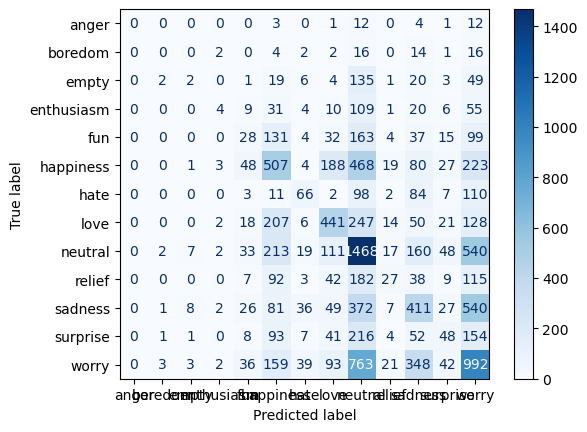

In [177]:
# Predict on the test set first
y_pred = lr_model.predict(X_test)

# Generate confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
cm_display.plot(cmap='Blues')
plt.show()


In [183]:
import joblib

In [187]:
# Save the trained model
joblib.dump(lr_model, "text_emotion_analysis.pkl")
print("Model saved successfully!")


Model saved successfully!


In [188]:
import pickle

In [189]:
filename = 'Text_Emotion_analysis.sav'
pickle.dump(lr_model, open(filename, 'wb'))

In [190]:
# loading the saved model
loaded_model = pickle.load(open('Text_EMotion_analysis.sav', 'rb'))